In [1]:
import os
import numpy as np
init_state = 2318

In [2]:
def graph1():
    Ps = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
    q = 0.7
    win = []
    for p in Ps:
        cmd = f"python ../code/encoder.py --opponent ../code/data/football/test-1.txt --p {p} --q {q} > football_mdp.txt"
        os.system(cmd)
        cmd = f"python ../code/planner.py --mdp football_mdp.txt > value.txt"
        os.system(cmd)
        f = open('value.txt', 'r')
        lines = f.readlines()
        value = float(lines[init_state].split()[0])        
        win.append(value)
    return win

In [3]:
win1 = graph1()
win1 = np.array(win1)
np.savetxt('win1.txt', win1)

In [4]:
def graph2():
    Qs = [0.6, 0.7, 0.8, 0.9, 1]
    p = 0.3
    win = []
    for q in Qs:
        cmd = f"python ../code/encoder.py --opponent ../code/data/football/test-1.txt --p {p} --q {q} > football_mdp.txt"
        os.system(cmd)
        cmd = f"python ../code/planner.py --mdp football_mdp.txt > value.txt"
        os.system(cmd)
        f = open('value.txt', 'r')
        lines = f.readlines()
        value = float(lines[init_state].split()[0])        
        win.append(value)
    return win

In [5]:
win2 = graph2()
win2 = np.array(win2)
np.savetxt('win1.txt', win2)

[0.7     0.28672 0.18    0.126   0.108   0.1    ]
[0.08  0.126 0.2   0.3   0.4  ]


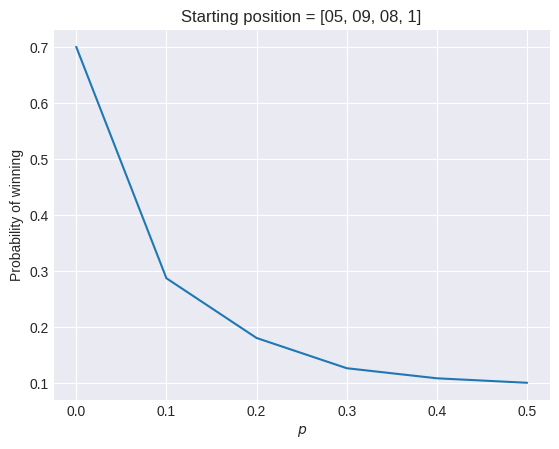

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
print(win1)
print(win2)
plt.plot([0, 0.1, 0.2, 0.3, 0.4, 0.5], win1)
plt.xlabel('$p$')
plt.ylabel('Probability of winning')
plt.title('Starting position = [05, 09, 08, 1]')
plt.savefig('../images/plot1.png')
plt.show()

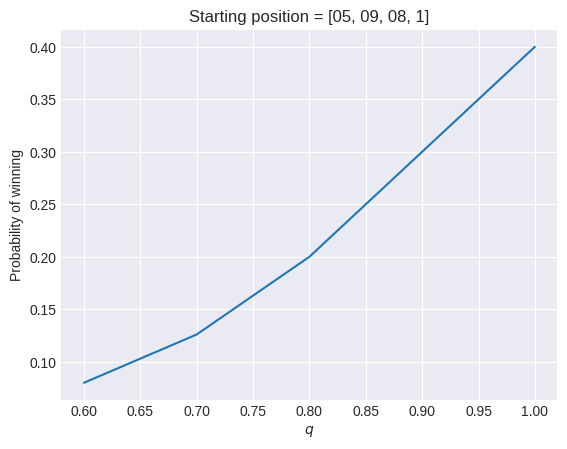

In [7]:
plt.plot([0.6, 0.7, 0.8, 0.9, 1],win2)
plt.xlabel('$q$')
plt.ylabel('Probability of winning')
plt.title('Starting position = [05, 09, 08, 1]')
plt.savefig('../images/plot2.png')
plt.show()
